In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define constants
R = 8.314 # J/(molK)
T = 323 # K

In [2]:
# Load data
z, d1,d2,d3,d4 = np.loadtxt('density_profiles.csv', unpack=True, skiprows=1, dtype='float', delimiter=',')

In [3]:
# calculate the minimum and maximum value of y
density_array=[]
for density in d1,d2,d3,d4:
    density_min, density_max = np.min(density), np.max(density)

# normalize the y data to the range [0,1]
    norm_density = (density - density_min) / (density_max - density_min)
   
# Calculate the free energy profile
    free_energy = (-R*T*np.log(norm_density))/1000

    #density_array.append(free_energy)
    if len(density_array) == 0:
        density_array = free_energy
    else:
        density_array = np.column_stack((density_array, free_energy))
    
final_array =np.column_stack((z,density_array))

df = pd.DataFrame(final_array)

# Write the exact columns names
df.columns = ["Z[nm]", "Heads", "Tails", "H2O", "H3O"]

# Write the free energy profile to a file
df.to_csv('free_energies.csv', sep=',', index=False)

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_7588\3748971512.py:10: RuntimeWarning: divide by zero encountered in log
  free_energy = (-R*T*np.log(norm_density))/1000


C:\Users\Mateusz\AppData\Local\Temp\ipykernel_7588\1494896261.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(t*10) for t in x])


Text(0, 0.5, 'Δ G [kJ/mol]')

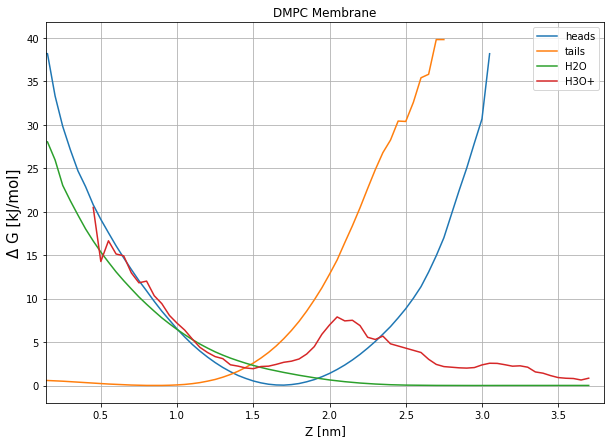

In [14]:
# Plot the results

data=pd.read_csv('free_energies.csv')

x= df["Z[nm]"]
y1= df["Heads"]
y2= df["Tails"]
y3= df["H2O"]
y4=df["H3O"]

# Figure with matplotlib

fig,ax =plt.subplots(figsize=(10, 7))
#plt.figure(figsize=(15,10))
plt.plot(x, y1, label='heads')
plt.plot(x, y2, label='tails')
plt.plot(x, y3, label='H2O')
plt.plot(x, y4, label='H3O+')
plt.grid(True)
plt.legend()
plt.title("DMPC Membrane")
plt.xlim(4.14,7.8)
ax.set_xticklabels([str(t*10) for t in x])
plt.xlabel("Z [nm]", fontsize=12)
plt.ylabel("\u0394 G [kJ/mol]", fontsize=15)
